# Email Spam Detection with Machine Learning

## Introduction
Email spam, or junk mail, is a common nuisance that many of us encounter daily. It often contains unwanted content, such as scams or phishing attempts. In this project, we will use Python to build an email spam detector. We'll leverage machine learning techniques to train the detector to recognize and classify emails into spam and non-spam categories.

## Dataset
To train our spam detector, we will use a dataset containing a collection of emails labeled as spam or non-spam. Each email in the dataset is represented as a set of features, such as the email content, sender information, and other relevant attributes.

## Steps

### 1. Data Collection
We start by collecting a dataset of labeled emails. This dataset will serve as the basis for training our machine learning model.

### 2. Data Preprocessing
Next, we preprocess the data to clean it and prepare it for training. This involves tasks such as removing HTML tags, converting text to lowercase, and removing stopwords.

### 3. Feature Extraction
We extract features from the preprocessed data. This could include word frequency counts, TF-IDF scores, or other relevant features that help the model distinguish between spam and non-spam emails.

### 4. Model Selection
For this project, we'll use a machine learning algorithm such as Naive Bayes, Support Vector Machine (SVM), or Random Forest, known for their effectiveness in text classification tasks.

### 5. Model Training
We train the selected model using the labeled dataset. During training, the model learns to differentiate between spam and non-spam emails based on the provided features.

### 6. Model Evaluation
After training, we evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score to assess its effectiveness in classifying emails.

### 7. Hyperparameter Tuning
To improve the model's performance, we fine-tune its hyperparameters using techniques like grid search or randomized search.

### 8. Prediction
Once the model is trained and optimized, we can use it to predict whether new, unseen emails are spam or non-spam.

## Conclusion
In conclusion, building an email spam detector using machine learning is a valuable project that can help identify and filter out unwanted emails. By leveraging Python and machine learning techniques, we can create an effective spam detection system to improve email security and user experience.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import re

In [2]:

# Download NLTK data (run only once)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
# Display the first few rows of the dataset
print("Dataset Head:\n", df.head())


Dataset Head:
      v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [5]:
# Display dataset info
print("\nDataset Info:\n")
df.info()



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:


# Drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [7]:


# Rename columns for easier access
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

In [8]:

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 label      0
message    0
dtype: int64


In [9]:
# Data Preprocessing
# Convert label to binary (spam: 1, ham: 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [10]:
# Text Preprocessing
ps = PorterStemmer()
corpus = []

for message in df['message']:
    message = re.sub('[^a-zA-Z]', ' ', message)
    message = message.lower()
    message = message.split()
    message = [ps.stem(word) for word in message if not word in set(stopwords.words('english'))]
    message = ' '.join(message)
    corpus.append(message)

In [11]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(corpus).toarray()

In [12]:
# Target variable
y = df['label']


In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


LogisticRegression()

In [15]:







# Predict on the test set
lr_predictions = lr_model.predict(X_test)



In [16]:
# Evaluate the Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_cm = confusion_matrix(y_test, lr_predictions)
lr_cr = classification_report(y_test, lr_predictions)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {lr_accuracy}")
print("Confusion Matrix:\n", lr_cm)
print("Classification Report:\n", lr_cr)




Logistic Regression Model Evaluation:
Accuracy: 0.9551569506726457
Confusion Matrix:
 [[961   4]
 [ 46 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.69      0.81       150

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



In [17]:
# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)



MultinomialNB()

In [18]:
# Predict on the test set
nb_predictions = nb_model.predict(X_test)



In [19]:
# Evaluate the Multinomial Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_cm = confusion_matrix(y_test, nb_predictions)
nb_cr = classification_report(y_test, nb_predictions)

print("\nMultinomial Naive Bayes Model Evaluation:")
print(f"Accuracy: {nb_accuracy}")
print("Confusion Matrix:\n", nb_cm)
print("Classification Report:\n", nb_cr)




Multinomial Naive Bayes Model Evaluation:
Accuracy: 0.968609865470852
Confusion Matrix:
 [[965   0]
 [ 35 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



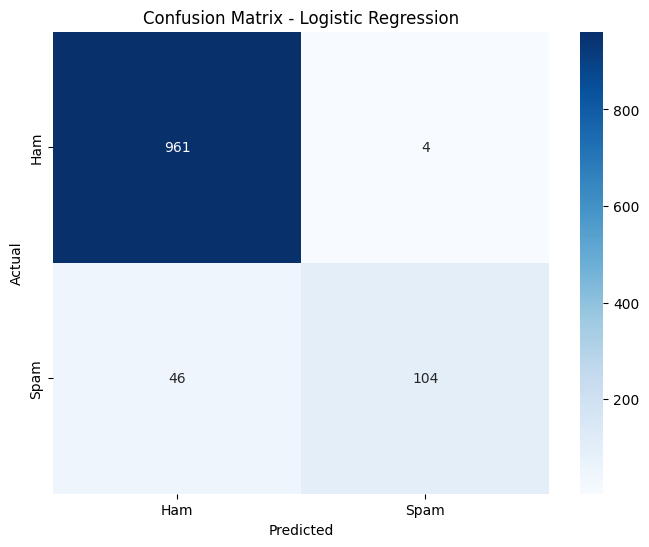

In [20]:
# Visualize the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



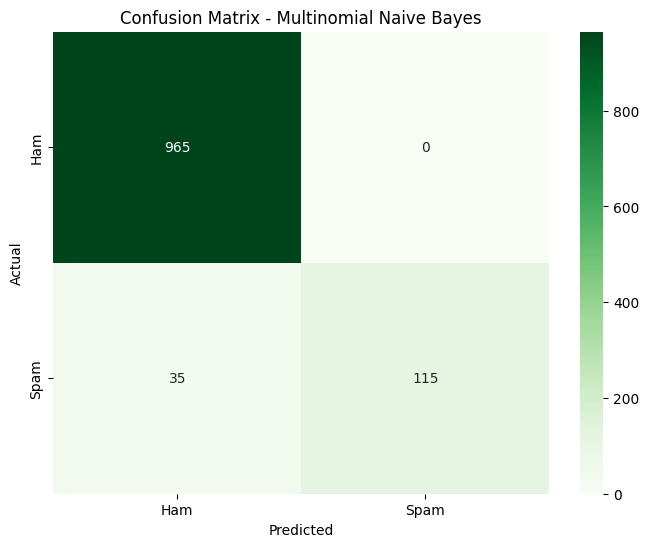

In [21]:
# Visualize the confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3912\2426340723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


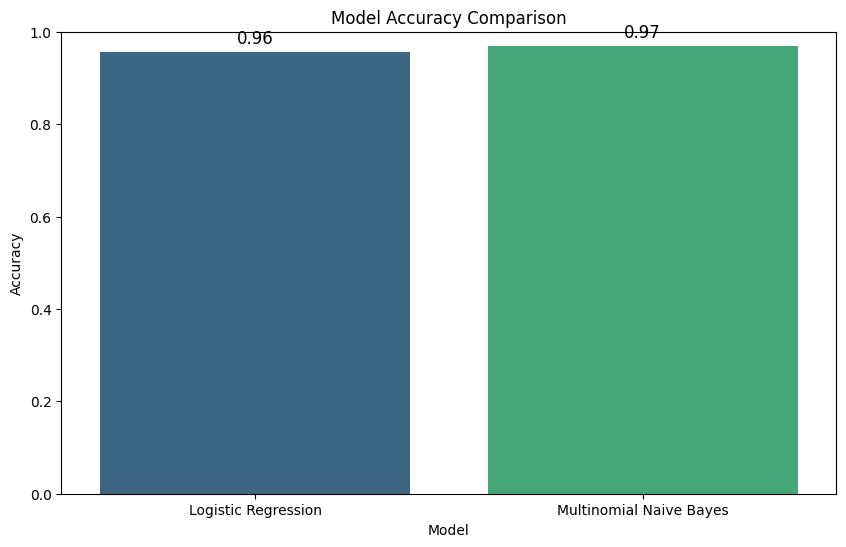

In [22]:
# Visualize the accuracy comparison
models = ['Logistic Regression', 'Multinomial Naive Bayes']
accuracies = [lr_accuracy, nb_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center', fontsize=12)
plt.show()
